## Paper : Time Series Prediction via Recurrent Neural Networks with the Information Bottleneck Principle

## Introduction

### • Background:
- Time series prediction is an important interdisciplinary topic in computer science, statistics, and econometrics.
- Recently, deep learning methods have been applied successfully to time series prediction.

### • Recurrent Neural Network:
- RNNs are particularly suitable for modeling time series as they operate on input information as well as the trace of previously acquired information.
- The most successful models: **LSTM** and its variant **GRU**.

### • Probabilistic Modeling:
- We propose a stochastic RNN trained using the **Recurrent Information Bottleneck (RIB)** as the objective function.
- The method maximizes the mutual information between latent state and the target, with low latent complexity.
- Our model: the input is first encoded to a latent state, then fed into the RNN cell to generate the next hidden state.  
  The decoder generates the distribution of the predicted value of the time series using both the latent and hidden states.

### • Two advantages:
- Stochastic latent state can augment RNN to better utilize recent observations.
- RIB can model the temporal dependencies of high-dimensional time series with lower complexity.


## Proposed Methods

### • Gated Recurrent Unit:
It has gating units that modulate the information flow inside the unit, but without having a separate memory cell:

\begin{align*}
r_t &= \sigma(W_r x_t + U_r h_{t-1} + b_r) \\
u_t &= \sigma(W_u x_t + U_u h_{t-1} + b_u) \\
c_t &= \tanh(W_c x_t + U_c (r_t \odot h_{t-1}) + b_c) \\
h_t &= u_t \odot h_{t-1} + (1 - u_t) \odot c_t
\end{align*}

with the input $ x_t $, the hidden state of GRU cell $ h_t $, the reset gate $ r_t $, the forgetting gate $ u_t $, and candidate activation $ c_t $.

### • Information Bottleneck:
It is an information-theoretic view of deep neural networks.  
Assuming:
- Input random variable: $ X $
- Latent state: $ Z $
- Target: $ Y $

The Markov chain $ Y \leftrightarrow X \leftrightarrow Z $ holds.

- The aim is to make latent $ Z $ informative about target $ Y $, i.e., to **maximize mutual information** $ I(Z, Y) $.
- To obtain a low-complexity representation of input, we assume $ I(X, Z) \leq \epsilon $, where $ \epsilon $ is a predefined threshold.

The optimization problem is formulated as:

$$
\max_{\theta} I(Z, Y; \theta) \quad \text{s.t.} \quad I(X, Z; \theta) < \epsilon
$$

By introducing Lagrange multiplier $ \beta \geq 0 $, we get the following objective:

$$
L_{IB}(\theta) = I(Z, Y; \theta) - \beta I(Z, X; \theta)
$$

### • Recurrent Information Bottleneck:
Information Bottleneck is extended to recurrent models.

- We use **multivariate Gaussian distribution** as a variational approximation.
- Temporal dependencies are modeled using the hidden states of the GRU.

The objective function is:

$$
\frac{1}{N} \sum_{n=1}^{N} \left[ \sum_{t=1}^{T} \int p(z_{nt} | x_{nt}) \log q(y_{nt} | z_{nt}) \, dz_{nt} 
\quad - \beta \int p(z_{nt} | x_{nt}) \log \frac{p(z_{nt} | x_{nt})}{\tilde{p}_t(z_{nt})} \, dz_{nt} \right]
$$


## Proposed Model

<p align="center">
  <img src="https://raw.githubusercontent.com/sarakpyny/CREST-Internship/main/img/rib_paper/rib_architecture.png" width="400"/>
</p>

- In our model, the input is first encoded to a latent state $ \mathbf{z}_t $, which is then fed into a GRU for state transition.
- $ \mathbf{z}_t $ is then decoded together with the hidden state to generate the output.
- The dashed lines in the diagram show the conditional dependency in both the prior of $ \mathbf{z}_t $ and the encoding of the input.

### • Encoding Distribution:
$$
Z_t \sim \mathcal{N}\left( \mu_{\text{enc}}(x_t, h_{t-1}), \, \operatorname{diag}\left(\sigma^2_{\text{enc}}(x_t, h_{t-1})\right) \right)
$$

### • Decoding Distribution:
$$
\hat{Y}_t \sim \mathcal{N}\left( \mu_{\text{dec}}(z_t, h_{t-1}), \, \operatorname{diag}\left(\sigma^2_{\text{dec}}(z_t, h_{t-1})\right) \right)
$$

### • Prior of Latent $ \mathbf{z}_t $:
$$
\tilde{p}(z_t \mid h_{t-1}) = \mathcal{N}\left( \mu_{\text{prior}}(h_{t-1}), \, \operatorname{diag}\left(\sigma^2_{\text{prior}}(h_{t-1})\right) \right)
$$

- All mean and variance functions here are realized by multi-layer neural networks.
- In the GRU cell, the hidden state is updated following standard GRU operations.


## Experiments

### • Sunspot Dataset:

- The first experiment uses the **sunspot dataset**, which contains sunspot numbers collected in Zurich from **Jan. 1749 to Dec. 1983**.
- We use the first **1000 data points for training** and 1000 for testing.

The $ (1 - \alpha) $-level **confidence interval** of the prediction is:

$$
\left[
\mu_{\text{dec}} - z_{1 - \alpha/2} \sqrt{\sigma^2_{\text{dec}}},
\quad
\mu_{\text{dec}} + z_{1 - \alpha/2} \sqrt{\sigma^2_{\text{dec}}}
\right]
$$

#### Prediction Plot:
<p align="center">
  <img src="https://raw.githubusercontent.com/sarakpyny/CREST-Internship/main/img/rib_paper/result_paper.png" width="600"/>
</p>

#### Performance Comparison:

|          | Proposed | RBM    | SAE    | LSTM   |
|----------|----------|--------|--------|--------|
| **MAE**  | 0.0453   | 0.0911 | 0.116  | 0.0524 |
| **RMSE** | 0.0612   | 0.132  | 0.150  | 0.0739 |



### • Traffic Data:

- The second experiment uses **traffic data**: 15 months of daily data from California’s Department of Transportation.
- The dataset describes **occupancy rates** of **963 freeways** in the Bay Area.

#### Performance Comparison:

|          | Proposed | MatFact | VRNN   | SAE    |
|----------|----------|---------|--------|--------|
| **NMAE** | 0.1127   | 0.1935  | 0.2103 | 0.2234 |
| **NMRSE**| 0.3608   | 0.4263  | 0.4312 | 0.4566 |



### Conclusion

- We propose to use the **information bottleneck** to model time series **probabilistically**.
- This method achieves **better prediction performance** than previous approaches.


## Implementation code
### Dara preparation

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

from scipy.stats import norm

In [3]:
# load data
df = pd.read_csv('data/Sunspots.csv')
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


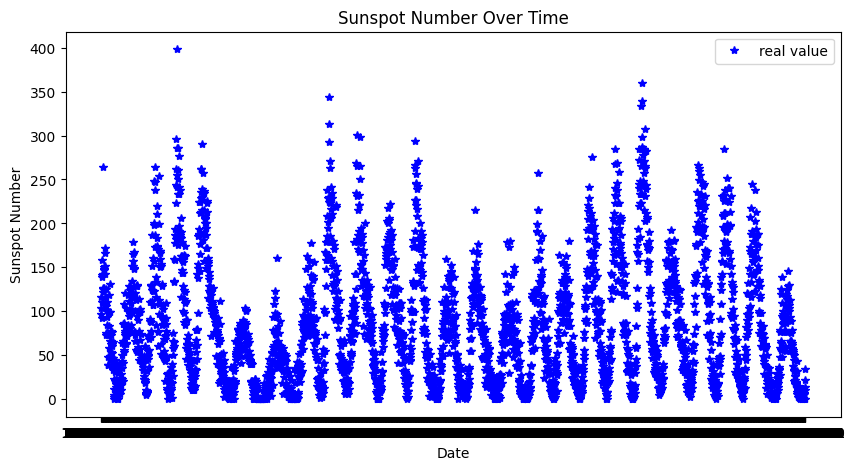

In [4]:
# plot original data not scaled
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'], 'b*', label='real value')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number Over Time')
plt.legend()
plt.show()

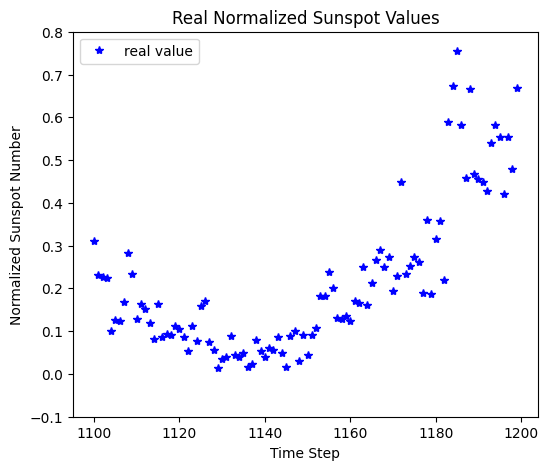

In [5]:
# Check if it corresponds to the paper
sunspot_series = df['Monthly Mean Total Sunspot Number'].values

# Normalize to [0, 1] using sklearn's MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(sunspot_series.reshape(-1, 1)).flatten()

# Take the desired window, e.g., index 1100–1200
x_range = range(1100, 1200)
y_values = scaled[1100:1200]

# Plot real values only
plt.figure(figsize=(6, 5))
plt.plot(x_range, y_values, 'b*', label='real value')

plt.xlabel('Time Step')
plt.ylabel('Normalized Sunspot Number')
plt.title('Real Normalized Sunspot Values')
plt.ylim(-0.1, 0.8)  # Optional: match the paper
plt.legend()
plt.show()

In [6]:
# convert 'Date' column to datetime and filter the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[(df['Date'] >= '1749-01-01') & (df['Date'] <= '1983-12-31')].reset_index(drop=True)

# rename columns
df_filtered.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'}, inplace=True)

# select columns
df_filtered = df_filtered[['Date', 'Sunspots']].iloc[:2000]

# Convert to numpy array and reshape for scaling
values = df_filtered['Sunspots'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values).flatten()

# split the data into train and test sets
train_seq = scaled_values[:1000]
test_seq = scaled_values[1000:2000]

# Ensure the sequences are of the same length
X_train = torch.tensor(train_seq[:-1]).unsqueeze(0).float()  # [1, 999]
Y_train = torch.tensor(train_seq[1:]).unsqueeze(0).float()   # [1, 999]

X_val = torch.tensor(test_seq[:-1]).unsqueeze(0).float()
Y_val = torch.tensor(test_seq[1:]).unsqueeze(0).float()

print(f"Train X: {X_train.shape}, Train Y: {Y_train.shape}")
print(f"Val X: {X_val.shape}, Val Y: {Y_val.shape}")

# Create DataLoader for training and validation sets
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=1, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, Y_val), batch_size=1, shuffle=False)

Train X: torch.Size([1, 999]), Train Y: torch.Size([1, 999])
Val X: torch.Size([1, 999]), Val Y: torch.Size([1, 999])


## Model Architecture

In [ ]:
# Step 1 : Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, z_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim + hidden_dim, 16),
            nn.ReLU(),
            nn.Linear(16, z_dim * 2)  
        )

    def forward(self, x_t, h_prev):
        inp = torch.cat([x_t, h_prev], dim=-1)
        stats = self.fc(inp)
        mu, logvar = stats.chunk(2, dim=-1)
        return mu, logvar

# Step 2 : Prior
class Prior(nn.Module):
    def __init__(self, hidden_dim, z_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 16),
            nn.ReLU(),
            nn.Linear(16, z_dim * 2)
        )

    def forward(self, h_prev):
        stats = self.fc(h_prev)
        mu, logvar = stats.chunk(2, dim=-1)
        return mu, logvar

# Step 3 : Decoder
class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(z_dim + hidden_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 2)  # mu and logvar for output y_t
        )

    def forward(self, z_t, h_prev):
        inp = torch.cat([z_t, h_prev], dim=-1)
        stats = self.fc(inp)
        mu, logvar = stats.chunk(2, dim=-1)
        return mu, logvar

# Reparameterization trick
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

# Step 4 : RIB_GRU_Model
class RIB_GRU_Model(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, z_dim=16):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.z_dim = z_dim

        self.encoder = Encoder(input_dim, hidden_dim, z_dim)
        self.prior = Prior(hidden_dim, z_dim)
        self.decoder = Decoder(z_dim, hidden_dim)

        self.gru_cell = nn.GRUCell(z_dim, hidden_dim)

    def forward(self, x_t, h_prev):
        # Encoder
        mu_enc, logvar_enc = self.encoder(x_t, h_prev)
        z_t = reparameterize(mu_enc, logvar_enc)

        # Prior
        mu_prior, logvar_prior = self.prior(h_prev)

        # Decoder
        mu_dec, logvar_dec = self.decoder(z_t, h_prev)

        # GRU update
        h_t = self.gru_cell(z_t, h_prev)

        return {
            'z_t': z_t,
            'mu_enc': mu_enc, 'logvar_enc': logvar_enc,
            'mu_prior': mu_prior, 'logvar_prior': logvar_prior,
            'mu_dec': mu_dec, 'logvar_dec': logvar_dec,
            'h_t': h_t
        }
    
# Loss function
LOG_2PI = torch.tensor(np.log(2.0 * np.pi))

def rib_loss(outputs, y_t, beta=0.005):
    
    mu_enc = outputs['mu_enc']
    logvar_enc = outputs['logvar_enc']
    mu_prior = outputs['mu_prior']
    logvar_prior = outputs['logvar_prior']
    mu_dec = outputs['mu_dec']
    logvar_dec = outputs['logvar_dec']

    log_2pi = LOG_2PI.to(y_t.device) 

    # Decoder Gaussian NLL
    var_dec = logvar_dec.exp()
    nll = 0.5 * (log_2pi + logvar_dec + ((y_t - mu_dec) ** 2) / var_dec)
    recon_loss = nll.mean()

    # KL(q || p)
    var_enc = logvar_enc.exp()
    var_prior = logvar_prior.exp()
    kl = 0.5 * torch.sum(logvar_prior - logvar_enc + (var_enc + (mu_enc - mu_prior) ** 2) / var_prior - 1, dim=-1).mean()

    return recon_loss + beta * kl

In [26]:
# Initialize model
model = RIB_GRU_Model(input_dim=1, hidden_dim=64, z_dim=16)
optimizer = optim.Adam(model.parameters(), lr=0.001)
beta = 0.005
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for X_batch, Y_batch in train_loader:
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        loss = 0.0
        for t in range(X_batch.size(1)):
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            out = model(x_t, h_t)
            h_t = out['h_t']

            # Compute loss
            loss += rib_loss(out, y_t, beta=beta)
            
        # Average loss over the batch
        loss /= X_batch.size(1)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_loss:.4f}")

# 5mins

Epoch 1/1000 | Train Loss: 0.8990
Epoch 2/1000 | Train Loss: 0.8842
Epoch 3/1000 | Train Loss: 0.8731
Epoch 4/1000 | Train Loss: 0.8600
Epoch 5/1000 | Train Loss: 0.8401
Epoch 6/1000 | Train Loss: 0.8264
Epoch 7/1000 | Train Loss: 0.8047
Epoch 8/1000 | Train Loss: 0.7920
Epoch 9/1000 | Train Loss: 0.7758
Epoch 10/1000 | Train Loss: 0.7530
Epoch 11/1000 | Train Loss: 0.7395
Epoch 12/1000 | Train Loss: 0.7152
Epoch 13/1000 | Train Loss: 0.6836
Epoch 14/1000 | Train Loss: 0.6635
Epoch 15/1000 | Train Loss: 0.6307
Epoch 16/1000 | Train Loss: 0.5946
Epoch 17/1000 | Train Loss: 0.5637
Epoch 18/1000 | Train Loss: 0.5321
Epoch 19/1000 | Train Loss: 0.4983
Epoch 20/1000 | Train Loss: 0.4763
Epoch 21/1000 | Train Loss: 0.4683
Epoch 22/1000 | Train Loss: 0.4531
Epoch 23/1000 | Train Loss: 0.4441
Epoch 24/1000 | Train Loss: 0.3908
Epoch 25/1000 | Train Loss: 0.3252
Epoch 26/1000 | Train Loss: 0.2908
Epoch 27/1000 | Train Loss: 0.2584
Epoch 28/1000 | Train Loss: 0.2206
Epoch 29/1000 | Train Loss: 0

In [ ]:
# Validation
model.eval()
preds = []
trues = []
vars_all = []

with torch.no_grad():
    for X_batch, Y_batch in val_loader:

        # Initialize hidden state
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        # Initialize lists to store predictions and variances
        pred_mu = []
        pred_var = []

        # Iterate through the sequence
        for t in range(X_batch.size(1)):
            # Get the current time step input and target
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            # Forward pass through the model
            out = model(x_t, h_t)
            h_t = out['h_t']

            # Extract predictions
            mu_dec = out['mu_dec']
            logvar_dec = out['logvar_dec']

            # Store predictions and variances
            pred_mu.append(mu_dec.squeeze(-1))
            pred_var.append(torch.exp(logvar_dec).squeeze(-1))

        # Stack predictions and variances
        pred_mu = torch.stack(pred_mu, dim=1)  # [1, T]
        pred_var = torch.stack(pred_var, dim=1)  # [1, T]

        # Append to the lists
        preds.append(pred_mu)
        vars_all.append(pred_var)
        trues.append(Y_batch)

# concat single batch
preds = torch.cat(preds, dim=0).squeeze(0).numpy()  # [T]
trues = torch.cat(trues, dim=0).squeeze(0).numpy()
vars_all = torch.cat(vars_all, dim=0).squeeze(0).numpy()

# Calculate MAE, RMSE
mae = np.mean(np.abs(preds - trues))
rmse = np.sqrt(np.mean((preds - trues)**2))

print(f"Final RIB MAE: {mae:.4f} | RMSE: {rmse:.4f}") # MAE : 0.0463 | RMSE : 0.0659

Final RIB MAE: 0.0463 | RMSE: 0.0659


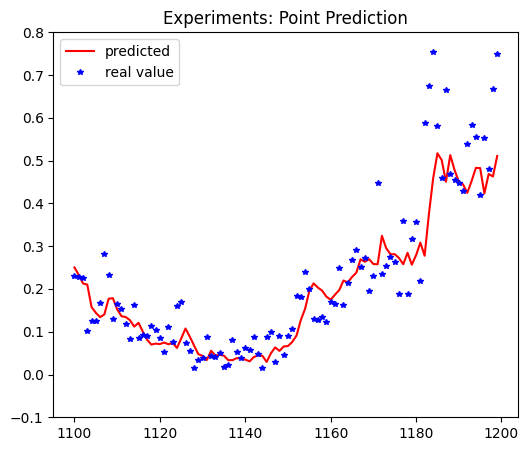

In [83]:
# Plotting the results
start = 100  # relative to test
end = 200

x = np.arange(1100, 1200)
mean_pred = preds[start:end]
true_points = trues[start:end]

plt.figure(figsize=(6, 5))
plt.plot(x, mean_pred, color='red', label="predicted")
plt.plot(x, true_points, 'b*', label="real value", markersize=4)

plt.ylim(-0.1, 0.8)
plt.title("Experiments: Point Prediction")
plt.legend()
plt.show()

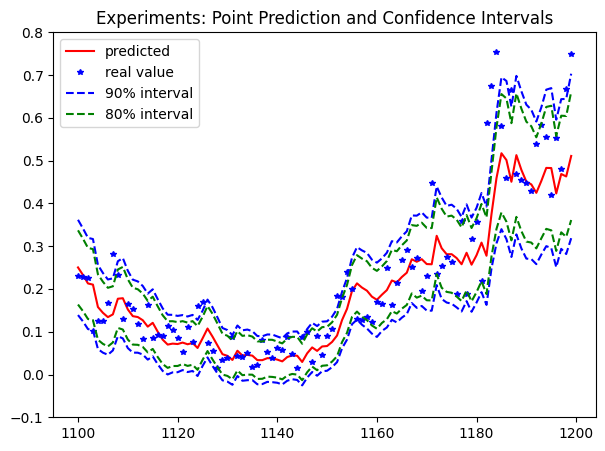

In [84]:
# Plotting confidence intervals as the paper 
# Z values for 90% and 80% intervals
z90 = norm.ppf(0.95)
z80 = norm.ppf(0.90)

std_pred = np.sqrt(vars_all[start:end])

# Calculate lower and upper bounds for 90% and 80% intervals
lower90 = mean_pred - z90 * std_pred
upper90 = mean_pred + z90 * std_pred

lower80 = mean_pred - z80 * std_pred
upper80 = mean_pred + z80 * std_pred

plt.figure(figsize=(7, 5))
plt.plot(x, mean_pred, color='red', label="predicted")
plt.plot(x, true_points, 'b*', label="real value", markersize=4)
plt.plot(x, lower90, 'b--', label="90% interval")
plt.plot(x, upper90, 'b--')
plt.plot(x, lower80, 'g--', label="80% interval")
plt.plot(x, upper80, 'g--')

plt.ylim(-0.1, 0.8)
plt.title("Experiments: Point Prediction and Confidence Intervals")
plt.legend()
plt.show()

## LSTM 

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64):
        super(SimpleLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.out = nn.Linear(hidden_dim, 1)

    def forward(self, x, h_c):
        out, (h, c) = self.lstm(x, h_c)
        y_hat = self.out(out)
        return y_hat, (h, c)

# Setup
model = SimpleLSTM(input_dim=1, hidden_dim=64)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 500

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for X_batch, Y_batch in train_loader:
        # X_batch: [B, T], need [B, T, 1]
        X_seq = X_batch.unsqueeze(-1)
        Y_seq = Y_batch.unsqueeze(-1)

        h_0 = torch.zeros(1, X_seq.size(0), model.hidden_dim)
        c_0 = torch.zeros(1, X_seq.size(0), model.hidden_dim)

        y_hat, _ = model(X_seq, (h_0, c_0))

        loss = criterion(y_hat, Y_seq)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_loss:.4f}")

# 1min

Epoch 1/500 | Train Loss: 0.0526
Epoch 2/500 | Train Loss: 0.0476
Epoch 3/500 | Train Loss: 0.0432
Epoch 4/500 | Train Loss: 0.0392
Epoch 5/500 | Train Loss: 0.0357
Epoch 6/500 | Train Loss: 0.0326
Epoch 7/500 | Train Loss: 0.0300
Epoch 8/500 | Train Loss: 0.0279
Epoch 9/500 | Train Loss: 0.0262
Epoch 10/500 | Train Loss: 0.0251
Epoch 11/500 | Train Loss: 0.0244
Epoch 12/500 | Train Loss: 0.0243
Epoch 13/500 | Train Loss: 0.0245
Epoch 14/500 | Train Loss: 0.0248
Epoch 15/500 | Train Loss: 0.0252
Epoch 16/500 | Train Loss: 0.0254
Epoch 17/500 | Train Loss: 0.0253
Epoch 18/500 | Train Loss: 0.0251
Epoch 19/500 | Train Loss: 0.0246
Epoch 20/500 | Train Loss: 0.0240
Epoch 21/500 | Train Loss: 0.0234
Epoch 22/500 | Train Loss: 0.0229
Epoch 23/500 | Train Loss: 0.0224
Epoch 24/500 | Train Loss: 0.0220
Epoch 25/500 | Train Loss: 0.0217
Epoch 26/500 | Train Loss: 0.0214
Epoch 27/500 | Train Loss: 0.0212
Epoch 28/500 | Train Loss: 0.0210
Epoch 29/500 | Train Loss: 0.0208
Epoch 30/500 | Train Lo

In [ ]:
# Evaluation
model.eval()
preds = []
trues = []

with torch.no_grad():
    for X_batch, Y_batch in val_loader:
        X_seq = X_batch.unsqueeze(-1)
        Y_seq = Y_batch.unsqueeze(-1)

        h_0 = torch.zeros(1, X_seq.size(0), model.hidden_dim)
        c_0 = torch.zeros(1, X_seq.size(0), model.hidden_dim)

        y_hat, _ = model(X_seq, (h_0, c_0))

        preds.append(y_hat.squeeze(-1))
        trues.append(Y_seq.squeeze(-1))

preds = torch.cat(preds, dim=0).squeeze(0).numpy()
trues = torch.cat(trues, dim=0).squeeze(0).numpy()

mae = np.mean(np.abs(preds - trues))
rmse = np.sqrt(np.mean((preds - trues)**2))

print(f"Final LSTM MAE: {mae:.4f} | RMSE: {rmse:.4f}") # MAE : 0.0470 | RMSE : 0.0638

Final LSTM MAE: 0.0470 | RMSE: 0.0638


### Comparison of Results

#### Paper Results

| Metric | Proposed | LSTM   |
|--------|----------|--------|
| MAE    | 0.0453   | 0.0524 |
| RMSE   | 0.0612   | 0.0739 |

#### Implementation

| Metric | Proposed | LSTM   |
|--------|----------|--------|
| MAE    | 0.0463   | 0.0470 |
| RMSE   | 0.0659   | 0.0638 |


#### Paper results
<p align="center">
  <img src="https://raw.githubusercontent.com/sarakpyny/CREST-Internship/main/img/rib_paper/result_paper.png" width="500"/>
</p>

#### Implementation

<p align="center">
  <img src="https://raw.githubusercontent.com/sarakpyny/CREST-Internship/main/img/rib_paper/result_implementation.png" width="500"/>
</p>


## RIB-LSTM

In [87]:
class RIB_LSTM_Model(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, z_dim=16):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.z_dim = z_dim

        self.encoder = Encoder(input_dim, hidden_dim, z_dim)
        self.prior = Prior(hidden_dim, z_dim)
        self.decoder = Decoder(z_dim, hidden_dim)

        # Use LSTMCell 
        self.lstm_cell = nn.LSTMCell(z_dim, hidden_dim)

    def forward(self, x_t, h_prev, c_prev):
        # Encoder
        mu_enc, logvar_enc = self.encoder(x_t, h_prev)
        z_t = reparameterize(mu_enc, logvar_enc)

        # Prior
        mu_prior, logvar_prior = self.prior(h_prev)

        # Decoder
        mu_dec, logvar_dec = self.decoder(z_t, h_prev)

        # Single LSTM step
        h_t, c_t = self.lstm_cell(z_t, (h_prev, c_prev))

        return {
            'z_t': z_t,
            'mu_enc': mu_enc, 'logvar_enc': logvar_enc,
            'mu_prior': mu_prior, 'logvar_prior': logvar_prior,
            'mu_dec': mu_dec, 'logvar_dec': logvar_dec,
            'h_t': h_t, 'c_t': c_t  
        }

In [88]:
# Initialize model
model = RIB_LSTM_Model(input_dim=1, hidden_dim=64, z_dim=16)
optimizer = optim.Adam(model.parameters(), lr=0.001)
beta = 0.005
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for X_batch, Y_batch in train_loader:
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)
        c_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        loss = 0.0
        for t in range(X_batch.size(1)):
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            out = model(x_t, h_t, c_t)
            h_t = out['h_t']
            c_t = out['c_t']

            loss += rib_loss(out, y_t, beta=beta) # Compute loss

        loss /= X_batch.size(1) # average over time steps
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_loss:.4f}")

# 5mins

Epoch 1/1000 | Train Loss: 1.0542
Epoch 2/1000 | Train Loss: 1.0431
Epoch 3/1000 | Train Loss: 1.0340
Epoch 4/1000 | Train Loss: 1.0273
Epoch 5/1000 | Train Loss: 1.0202
Epoch 6/1000 | Train Loss: 1.0128
Epoch 7/1000 | Train Loss: 1.0040
Epoch 8/1000 | Train Loss: 0.9953
Epoch 9/1000 | Train Loss: 0.9833
Epoch 10/1000 | Train Loss: 0.9725
Epoch 11/1000 | Train Loss: 0.9695
Epoch 12/1000 | Train Loss: 0.9568
Epoch 13/1000 | Train Loss: 0.9468
Epoch 14/1000 | Train Loss: 0.9280
Epoch 15/1000 | Train Loss: 0.9172
Epoch 16/1000 | Train Loss: 0.8961
Epoch 17/1000 | Train Loss: 0.8871
Epoch 18/1000 | Train Loss: 0.8686
Epoch 19/1000 | Train Loss: 0.8401
Epoch 20/1000 | Train Loss: 0.8130
Epoch 21/1000 | Train Loss: 0.7876
Epoch 22/1000 | Train Loss: 0.7860
Epoch 23/1000 | Train Loss: 0.7848
Epoch 24/1000 | Train Loss: 0.7734
Epoch 25/1000 | Train Loss: 0.7514
Epoch 26/1000 | Train Loss: 0.7239
Epoch 27/1000 | Train Loss: 0.7089
Epoch 28/1000 | Train Loss: 0.6860
Epoch 29/1000 | Train Loss: 0

In [ ]:
# Evaluation
model.eval()

preds = []
trues = []
vars_all = []

with torch.no_grad():
    for X_batch, Y_batch in val_loader:
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)
        c_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        pred_mu = []
        pred_var = []

        for t in range(X_batch.size(1)):
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            out = model(x_t, h_t, c_t)
            h_t = out['h_t']
            c_t = out['c_t']

            mu_dec = out['mu_dec']
            logvar_dec = out['logvar_dec']

            pred_mu.append(mu_dec.squeeze(-1))
            pred_var.append(torch.exp(logvar_dec).squeeze(-1))

        pred_mu = torch.stack(pred_mu, dim=1)  # [1, T]
        pred_var = torch.stack(pred_var, dim=1)  # [1, T]

        preds.append(pred_mu)
        vars_all.append(pred_var)
        trues.append(Y_batch)

# concat single batch
preds = torch.cat(preds, dim=0).squeeze(0).numpy()  # [T]
trues = torch.cat(trues, dim=0).squeeze(0).numpy()
vars_all = torch.cat(vars_all, dim=0).squeeze(0).numpy()

# Calculate MAE, RMSE
mae = np.mean(np.abs(preds - trues))
rmse = np.sqrt(np.mean((preds - trues)**2))

print(f"Final RIB-LSTM MAE: {mae:.4f} | RMSE: {rmse:.4f}") # MAE : 0.0452 | RMSE : 0.0640

Final RIB-LSTM MAE: 0.0452 | RMSE: 0.0640


## Test Proposed Methode

#### Method: (VLSTM-IB)

Instead of computing $ C_t $ via the standard forget and input gates, we sample:

$$
z_t \sim \mathcal{N}(\mu_{\text{enc}}(x_t, h_{t-1}), \operatorname{diag}(\sigma^2_{\text{enc}}(x_t, h_{t-1})))
\quad \text{and we set} \quad C_t := z_t
$$

#### Here:
- $ z_t $ is drawn from a learned encoder distribution conditioned on $ x_t $ and $ h_{t-1} $.
- The mean $ \mu_{\text{enc}} $ and variance $ \sigma^2_{\text{enc}} $ are computed by neural networks.
- This stochastic $ z_t $ acts as a compressed representation.

The output gate remains as in the standard LSTM:

$$
o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)
$$

Then the hidden state is updated using $ z_t $ (now playing the role of $ C_t $):

$$
h_t = o_t \odot \tanh(z_t) \quad \Longleftrightarrow \quad h_t = o_t \odot \tanh(C_t)
$$


#### How $ z_t $ is Computed

- Given $ x_t $ and $ h_{t-1} $, the encoder network outputs:
  $$
  \mu_{\text{enc}}(x_t, h_{t-1}), \quad \sigma^2_{\text{enc}}(x_t, h_{t-1})
  $$

- We sample $ \epsilon \sim \mathcal{N}(0, I) $ and use the reparameterization trick:

  $$
  z_t = \mu_{\text{enc}}(x_t, h_{t-1}) + \sigma_{\text{enc}}(x_t, h_{t-1}) \odot \epsilon
  $$

- This ensures that gradients can flow through $ \mu_{\text{enc}} $ and $ \sigma_{\text{enc}} $ during training.


#### Variational IB Loss for LSTM

To train the IB-LSTM cell, we maximize a **variational lower bound** that balances:
- High predictive power
- Strong compression

The objective for a sequence of length $ T $ over $ N $ examples is:

$$
L_{\text{IB-LSTM}} = \frac{1}{N} \sum_{n=1}^{N} \left[ \sum_{t=1}^{T}
\mathbb{E}_{z_t \sim p(z_t \mid x_t, h_{t-1})} \left[
- \log q(y_t \mid z_t)
\right]
+ \beta \, \text{KL}(p(z_t \mid x_t, h_{t-1}) \parallel p_{\text{prior}}(z_t \mid h_{t-1}))
\right]
$$


#### Explanation:

- $ q(y_t \mid z_t) $ is the decoder that predicts the output at time $ t $ given $ z_t $.
- $ p(z_t \mid x_t, h_{t-1}) $ is the encoder distribution producing the posterior over $ z_t $.
- $ p_{\text{prior}}(z_t \mid h_{t-1}) $ is the approximate prior, for example a Gaussian conditioned only on $ h_{t-1} $:
  $$
  p_{\text{prior}}(z_t \mid h_{t-1}) = \mathcal{N}(\mu_{\text{prior}}(h_{t-1}), \operatorname{diag}(\sigma^2_{\text{prior}}(h_{t-1})))
  $$
- $ \beta $ controls the trade-off between compression and prediction.


In [120]:
class IB_VLSTM_Model(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, z_dim=16):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.z_dim = z_dim

        self.encoder = Encoder(input_dim, hidden_dim, z_dim)
        self.prior = Prior(hidden_dim, z_dim)
        self.decoder = Decoder(z_dim, hidden_dim)

        # Output gate:
        self.output_gate = nn.Linear(hidden_dim + input_dim, hidden_dim)
        self.z_to_hidden = nn.Linear(z_dim, hidden_dim)  

    def forward(self, x_t, h_prev):
        mu_enc, logvar_enc = self.encoder(x_t, h_prev)
        z_t = reparameterize(mu_enc, logvar_enc)

        mu_prior, logvar_prior = self.prior(h_prev)
        mu_dec, logvar_dec = self.decoder(z_t, h_prev)

        # Output gate: o_t = σ(Wo [h_prev, x_t])
        o_t = torch.sigmoid(self.output_gate(torch.cat([h_prev, x_t], dim=-1)))

        # Project z to hidden dim for tanh
        z_proj = self.z_to_hidden(z_t)

        h_t = o_t * torch.tanh(z_proj)

        return {
            'z_t': z_t,
            'mu_enc': mu_enc, 'logvar_enc': logvar_enc,
            'mu_prior': mu_prior, 'logvar_prior': logvar_prior,
            'mu_dec': mu_dec, 'logvar_dec': logvar_dec,
            'h_t': h_t
        }


In [121]:
model = IB_VLSTM_Model(input_dim=1, hidden_dim=64, z_dim=16)
optimizer = optim.Adam(model.parameters(), lr=0.001)
beta = 0.005
num_epochs = 1000

# For numerical stability, put on device
LOG_2PI = torch.log(torch.tensor(2.0 * np.pi)).to(next(model.parameters()).device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for X_batch, Y_batch in train_loader:
        # Init hidden state
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        # Move to device if needed
        h_t = h_t.to(X_batch.device)

        loss = 0.0
        for t in range(X_batch.size(1)):
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            out = model(x_t, h_t)
            h_t = out['h_t']

            mu_dec = out['mu_dec'].squeeze(-1)
            logvar_dec = out['logvar_dec'].squeeze(-1)

            nll = 0.5 * (LOG_2PI + logvar_dec + ((y_t.squeeze(-1) - mu_dec) ** 2) / torch.exp(logvar_dec))
            nll = nll.mean()

            mu_enc = out['mu_enc']
            logvar_enc = out['logvar_enc']
            mu_prior = out['mu_prior']
            logvar_prior = out['logvar_prior']

            kl = 0.5 * torch.sum(
                logvar_prior - logvar_enc +
                (torch.exp(logvar_enc) + (mu_enc - mu_prior) ** 2) / torch.exp(logvar_prior) - 1,
                dim=-1
            ).mean()

            loss += nll + beta * kl

        loss /= X_batch.size(1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_loss:.4f}")


Epoch 1/1000 | Train Loss: 1.0270
Epoch 2/1000 | Train Loss: 1.0173
Epoch 3/1000 | Train Loss: 1.0119
Epoch 4/1000 | Train Loss: 1.0045
Epoch 5/1000 | Train Loss: 0.9967
Epoch 6/1000 | Train Loss: 0.9916
Epoch 7/1000 | Train Loss: 0.9844
Epoch 8/1000 | Train Loss: 0.9759
Epoch 9/1000 | Train Loss: 0.9729
Epoch 10/1000 | Train Loss: 0.9661
Epoch 11/1000 | Train Loss: 0.9613
Epoch 12/1000 | Train Loss: 0.9539
Epoch 13/1000 | Train Loss: 0.9495
Epoch 14/1000 | Train Loss: 0.9448
Epoch 15/1000 | Train Loss: 0.9396
Epoch 16/1000 | Train Loss: 0.9318
Epoch 17/1000 | Train Loss: 0.9286
Epoch 18/1000 | Train Loss: 0.9252
Epoch 19/1000 | Train Loss: 0.9176
Epoch 20/1000 | Train Loss: 0.9143
Epoch 21/1000 | Train Loss: 0.9084
Epoch 22/1000 | Train Loss: 0.9031
Epoch 23/1000 | Train Loss: 0.8940
Epoch 24/1000 | Train Loss: 0.8905
Epoch 25/1000 | Train Loss: 0.8834
Epoch 26/1000 | Train Loss: 0.8776
Epoch 27/1000 | Train Loss: 0.8746
Epoch 28/1000 | Train Loss: 0.8683
Epoch 29/1000 | Train Loss: 0

In [ ]:
# Evaluation for IB-LSTM
model.eval()

preds = []
trues = []
vars_all = []
with torch.no_grad():
    for X_batch, Y_batch in val_loader:
        h_t = torch.zeros(X_batch.size(0), model.hidden_dim)

        pred_mu = []
        pred_var = []

        for t in range(X_batch.size(1)):
            x_t = X_batch[:, t].unsqueeze(-1)
            y_t = Y_batch[:, t].unsqueeze(-1)

            out = model(x_t, h_t)
            h_t = out['h_t']

            mu_dec = out['mu_dec']
            logvar_dec = out['logvar_dec']

            pred_mu.append(mu_dec.squeeze(-1))
            pred_var.append(torch.exp(logvar_dec).squeeze(-1))

        pred_mu = torch.stack(pred_mu, dim=1)  # [batch, T]
        pred_var = torch.stack(pred_var, dim=1)

        preds.append(pred_mu)
        vars_all.append(pred_var)
        trues.append(Y_batch)

# Concatenate all batches
preds = torch.cat(preds, dim=0).numpy()
trues = torch.cat(trues, dim=0).numpy()
vars_all = torch.cat(vars_all, dim=0).numpy()

# Calculate metrics
mae = np.mean(np.abs(preds - trues))
rmse = np.sqrt(np.mean((preds - trues) ** 2))

print(f" Final IB-LSTM MAE: {mae:.4f} | RMSE: {rmse:.4f}") # MAE : 0.0481 | RMSE : 0.0672

 Final IB-LSTM MAE: 0.0481 | RMSE: 0.0672


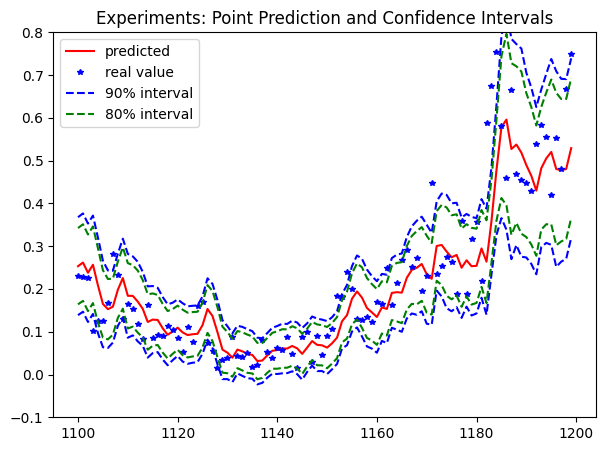

In [263]:
# Ensure inputs are 1D numpy arrays
mean_pred = np.array(preds).flatten()
true_points = np.array(trues).flatten()
std_pred = np.sqrt(np.array(vars_all).flatten())

# Define range safely
start, end = 100, min(200, len(mean_pred))
x = np.arange(1100, 1100 + (end - start))

# Slice
mean_pred = mean_pred[start:end]
true_points = true_points[start:end]
std_pred = std_pred[start:end]

# Confidence intervals
z90, z80 = norm.ppf(0.95), norm.ppf(0.90)
l90, u90 = mean_pred - z90*std_pred, mean_pred + z90*std_pred
l80, u80 = mean_pred - z80*std_pred, mean_pred + z80*std_pred

# Plot
plt.figure(figsize=(7, 5))
plt.plot(x, mean_pred, 'r', label="predicted")
plt.plot(x, true_points, 'b*', label="real value", markersize=4)
plt.plot(x, l90, 'b--', label="90% interval"); plt.plot(x, u90, 'b--')
plt.plot(x, l80, 'g--', label="80% interval"); plt.plot(x, u80, 'g--')
plt.ylim(-0.1, 0.8)
plt.title("Experiments: Point Prediction and Confidence Intervals")
plt.legend()
plt.show()


### Compares results

**Data set** 1000 for tranning and 1000 for testing

|          | IB-GRU(paper) | LSTM    | IB-LSTM    | Our idea   |
|----------|----------|--------|--------|--------|
| **MAE**  | 0.0463    | 0.0470 | 0.0452  | 0.0481 |
| **RMSE** | 0.0659   | 0.0638  | 0.0640  | 0.0672 |
